In [61]:
from sklearn.datasets import fetch_lfw_people ##Dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [62]:
dataset = fetch_lfw_people(resize=0.4, min_faces_per_person=70)

In [63]:
#Dataset
X = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [65]:
n,h,w = images.shape
print("No of Images - ",n)
print("Height - ",h)
print("Width - ",w)

No of Images -  1288
Height -  50
Width -  37


In [66]:
X.shape

(1288, 1850)

In [67]:
len(target_names) ## No.of categories/classes

7

In [68]:
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

In [69]:
y.shape

(1288,)

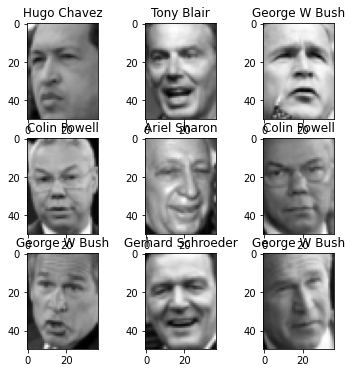

In [70]:
def plot_grid(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(2*cols, 2 *rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w), cmap='gray')
        plt.title(target_names[titles[i]])
plot_grid(X,y,h,w)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1) #Splitting the data

In [72]:
X_train.shape

(1159, 1850)

In [73]:
p = PCA()
p.fit(X_train)

PCA()

In [74]:
p.transform(X_train).shape

(1159, 1159)

In [75]:
var = p.explained_variance_
print(var)
com = p.components_
print(com.shape)

[4.9230288e+05 3.9814316e+05 1.9089628e+05 ... 4.1038650e-01 4.0505245e-01
 2.8579773e-06]
(1159, 1850)


In [76]:
val_sum = sum(p.explained_variance_)
print(val_sum)
sort_ind = np.argsort(var)
sort_ind = sort_ind[::-1]

2606185.863418397


In [78]:
temp_sum = 0
principle_vec = []
principle_val = []
i=0
while(temp_sum < 0.98*val_sum):
    principle_vec.append(com[sort_ind[i]])
    principle_val.append(var[sort_ind[i]])
    temp_sum += var[sort_ind[i]]
    i += 1
print("No of Components - ", i)

No of Components -  250


In [79]:
principle_vec = np.matrix(principle_vec)

In [80]:
print(principle_vec.shape)

(250, 1850)


In [81]:
X_train_trans = np.dot(X_train, principle_vec.T)
X_test_trans = np.dot(X_test, principle_vec.T)

In [82]:
X_train_trans.shape

(1159, 250)

In [83]:
clf_t = MLPClassifier(hidden_layer_sizes=(512, ), batch_size=128, verbose=True, early_stopping=True)
clf_t.fit(X_train_trans, y_train)

Iteration 1, loss = 12.13764909
Validation score: 0.241379
Iteration 2, loss = 10.16823189
Validation score: 0.491379
Iteration 3, loss = 5.86264286
Validation score: 0.612069
Iteration 4, loss = 3.91950922
Validation score: 0.706897
Iteration 5, loss = 2.49224742
Validation score: 0.724138
Iteration 6, loss = 1.92877811
Validation score: 0.775862
Iteration 7, loss = 1.23010569
Validation score: 0.767241
Iteration 8, loss = 0.77820387
Validation score: 0.801724
Iteration 9, loss = 0.36517760
Validation score: 0.784483
Iteration 10, loss = 0.20671591
Validation score: 0.801724
Iteration 11, loss = 0.07845141
Validation score: 0.810345
Iteration 12, loss = 0.06690807
Validation score: 0.801724
Iteration 13, loss = 0.15349541
Validation score: 0.818966
Iteration 14, loss = 0.12782991
Validation score: 0.801724
Iteration 15, loss = 0.11516668
Validation score: 0.775862
Iteration 16, loss = 0.04959962
Validation score: 0.810345
Iteration 17, loss = 0.01387081
Validation score: 0.818966
Iter

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(512,),
              verbose=True)

In [84]:
y_pred = clf_t.predict(X_test_trans)
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.80      0.67         5
     Colin Powell       0.69      0.73      0.71        15
  Donald Rumsfeld       0.75      0.90      0.82        10
    George W Bush       0.96      0.91      0.93        53
Gerhard Schroeder       0.88      0.79      0.83        19
      Hugo Chavez       0.90      0.64      0.75        14
       Tony Blair       0.59      0.77      0.67        13

         accuracy                           0.82       129
        macro avg       0.76      0.79      0.77       129
     weighted avg       0.84      0.82      0.83       129



In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 4  1  0  0  0  0  0]
 [ 2 11  2  0  0  0  0]
 [ 0  0  9  1  0  0  0]
 [ 0  3  1 48  0  0  1]
 [ 1  0  0  0 15  1  2]
 [ 0  0  0  0  1  9  4]
 [ 0  1  0  1  1  0 10]]


In [87]:
n_components = 250
mean_imgs = []
for i in range (n_components):
    v  = principle_vec[i,:]
    img = v.reshape((h,w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(250, 50, 37)


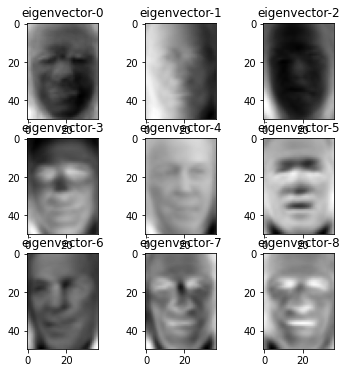

In [88]:
def plot_grid(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(2*cols, 2 *rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w), cmap='gray')
        plt.title(titles[i])
pca_tiles = [f"eigenvector-{i}" for i in range(n_components)]
plot_grid(mean_imgs, pca_tiles, h, w)